In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_docker import create_df

In [2]:
df= create_df()
print(df)

     VulnerabilityID                                            PkgName  \
0     CVE-2024-25269  pkg:deb/debian/libheif@1.15.1-1?os_distro=book...   
1      CVE-2005-2541  pkg:deb/debian/tar@1.34+dfsg-1.2+deb12u1?os_di...   
2      CVE-2007-5686  pkg:deb/debian/shadow@1:4.13+dfsg1-1?os_distro...   
3      CVE-2007-6755  pkg:deb/debian/openssl@3.0.11-1~deb12u2?os_dis...   
4      CVE-2009-4487  pkg:deb/debian/nginx@1.25.4-1~bookworm?os_dist...   
...              ...                                                ...   
3032  CVE-2023-31439  pkg:deb/debian/systemd@252.22-1~deb12u1?os_dis...   
3033  CVE-2023-31486  pkg:deb/debian/perl@5.36.0-7+deb12u1?os_distro...   
3034  CVE-2024-25260  pkg:deb/debian/elfutils@0.188-2.1?os_distro=bo...   
3035  CVE-2023-52426  pkg:deb/debian/expat@2.5.0-1?os_distro=bookwor...   
3036  CVE-2023-52425  pkg:deb/debian/expat@2.5.0-1?os_distro=bookwor...   

     Fixed_or_not     Severity Container  
0       not fixed  UNSPECIFIED     nginx  
1       not f

<Axes: >

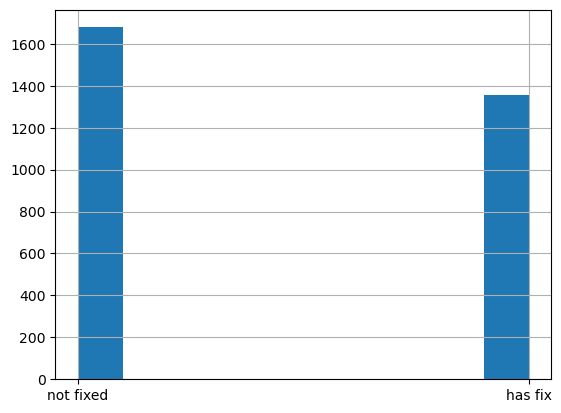

In [4]:
df['Fixed_or_not'].hist()

<Axes: >

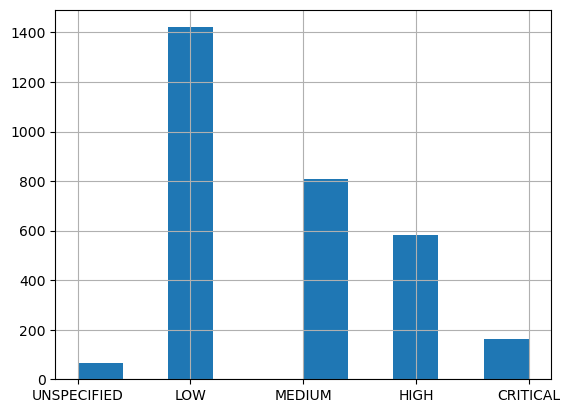

In [5]:
df['Severity'].hist()

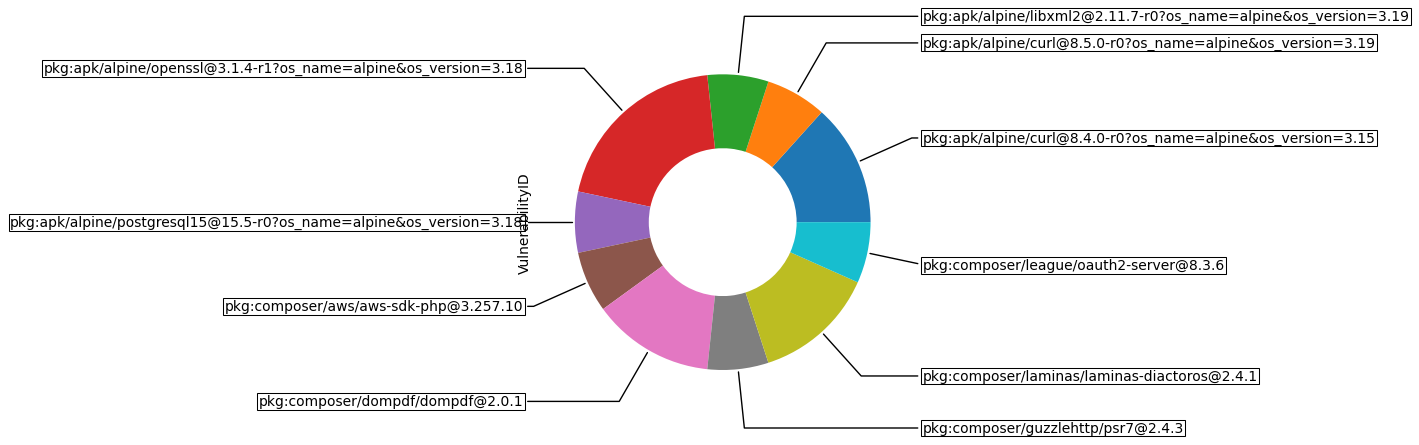

In [6]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [7]:
containers = df['Container'].unique()

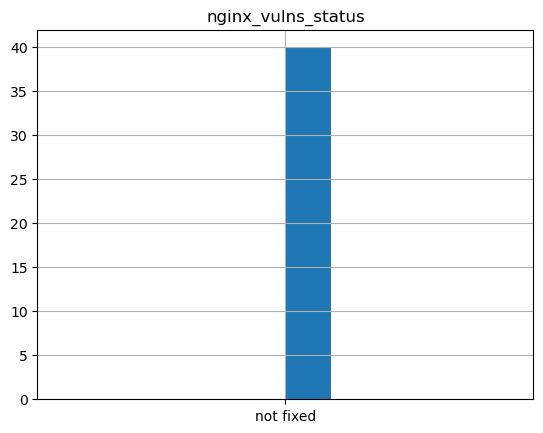

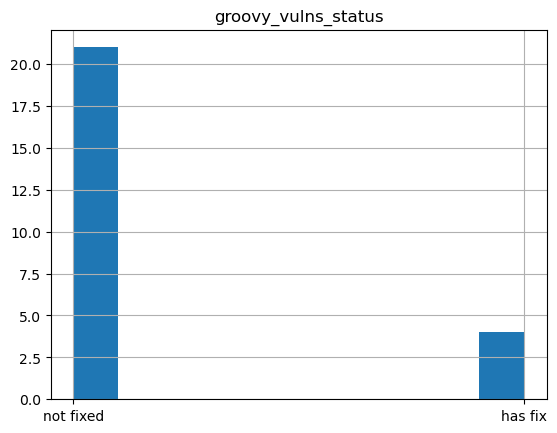

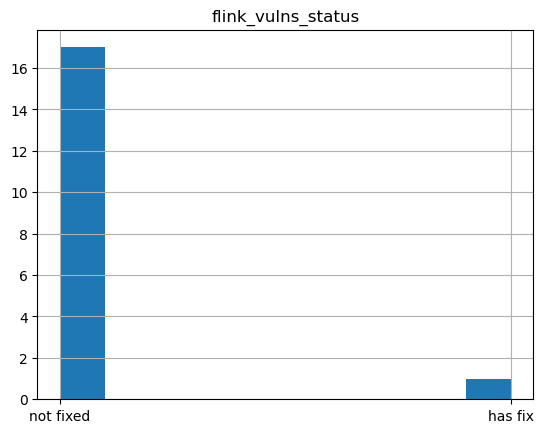

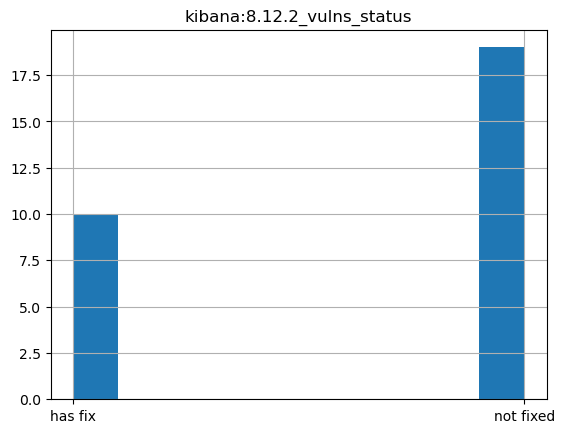

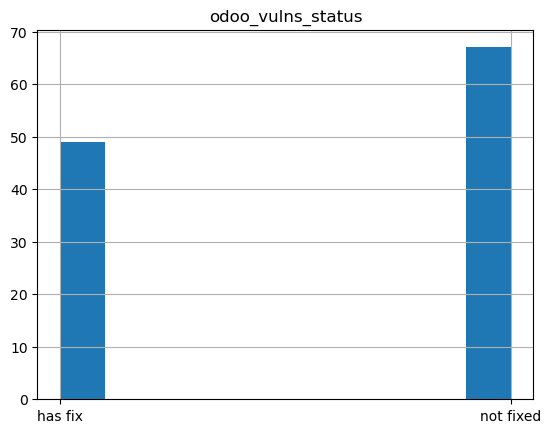

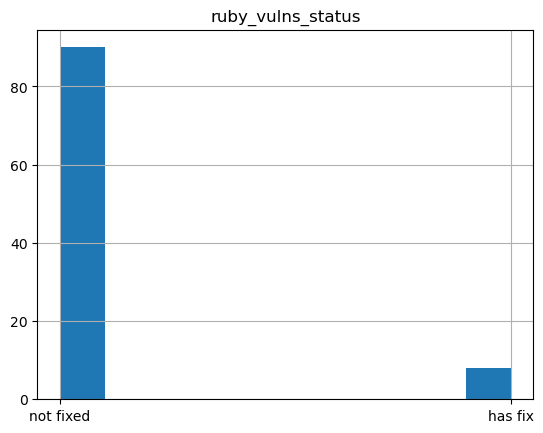

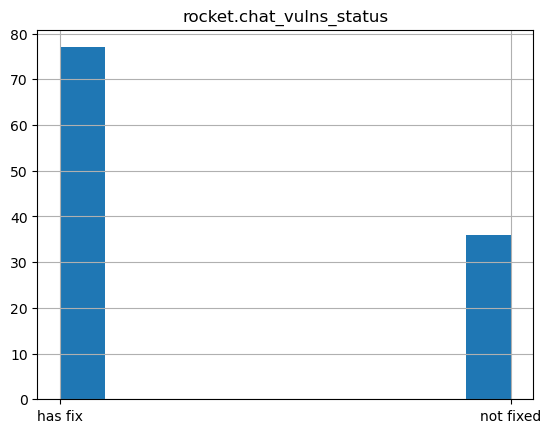

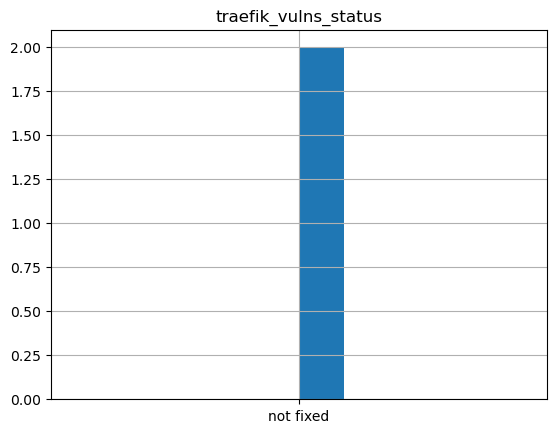

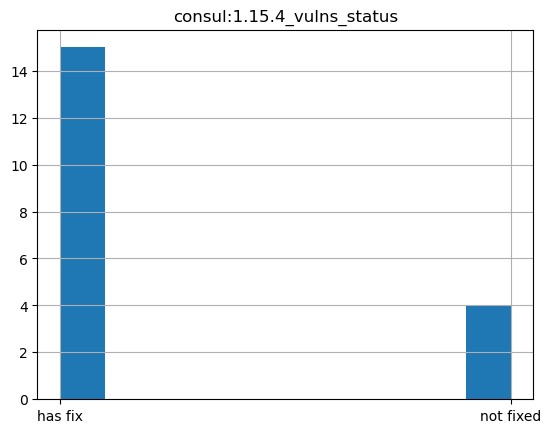

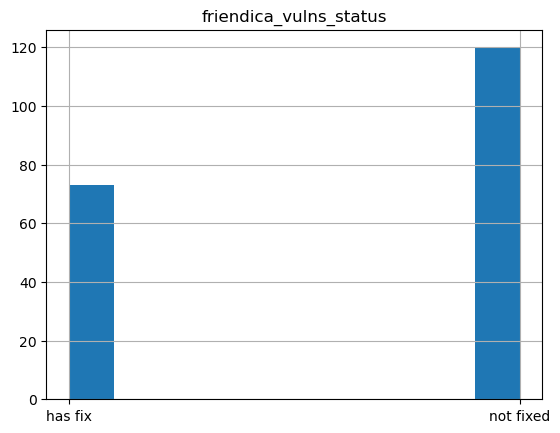

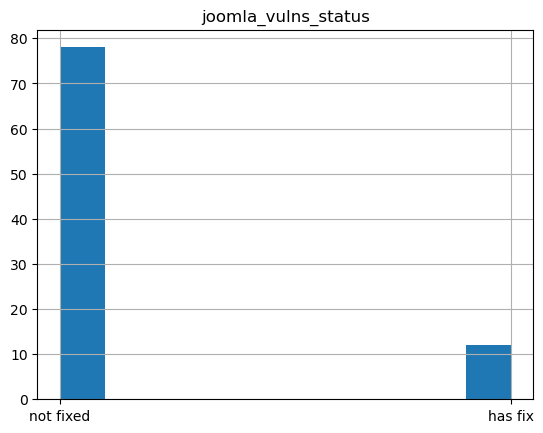

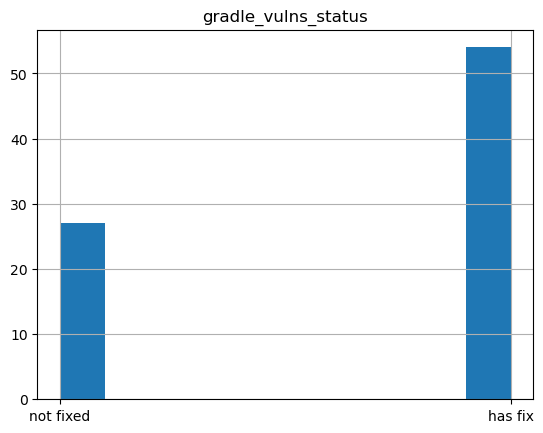

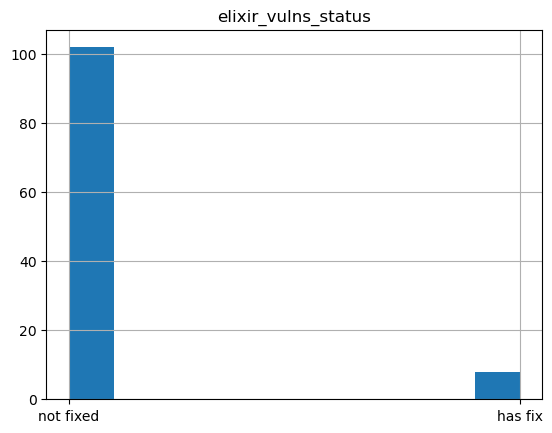

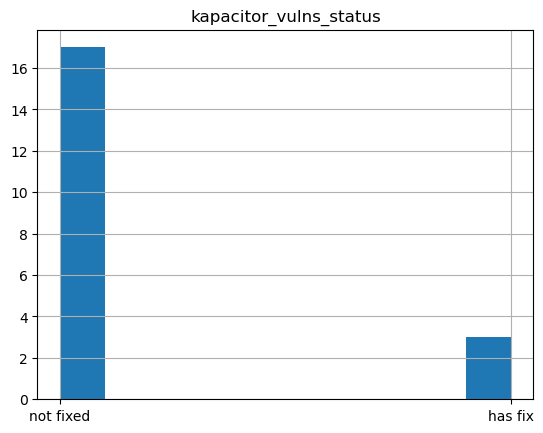

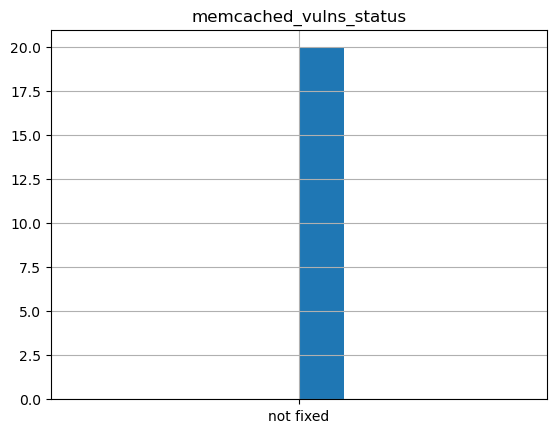

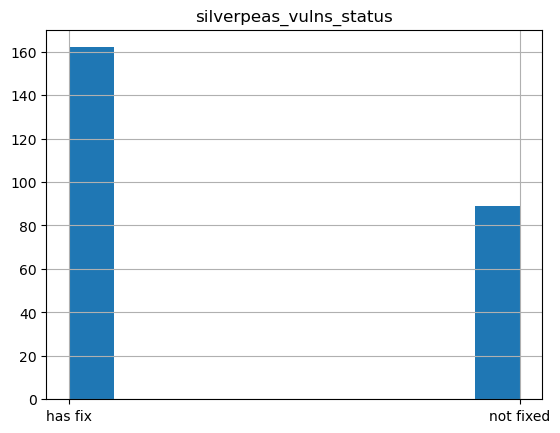

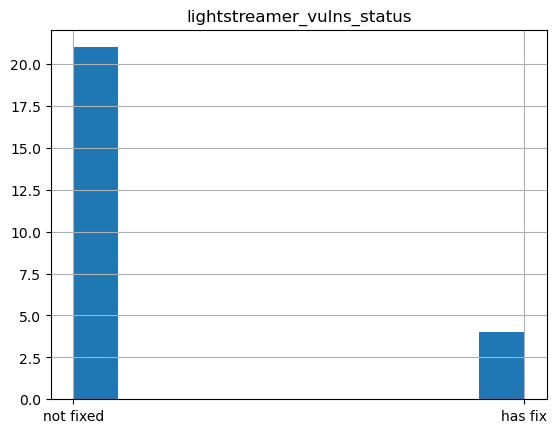

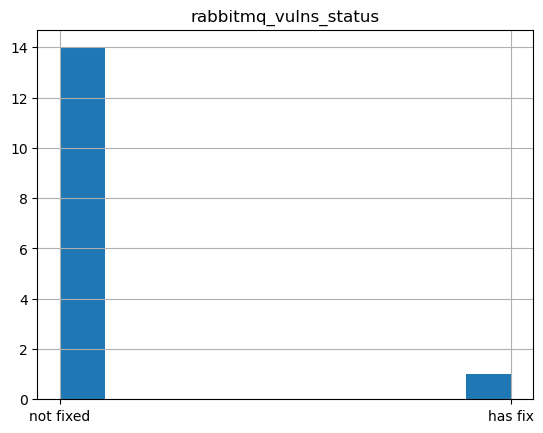

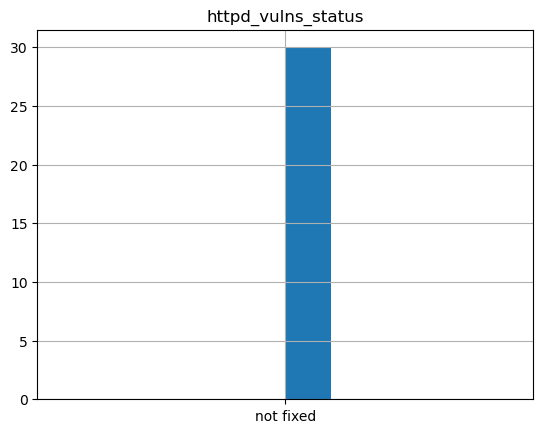

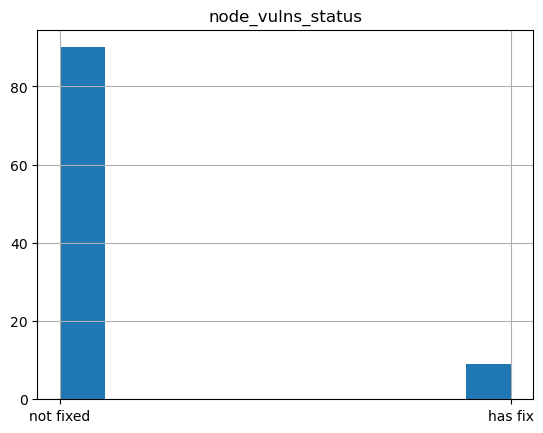

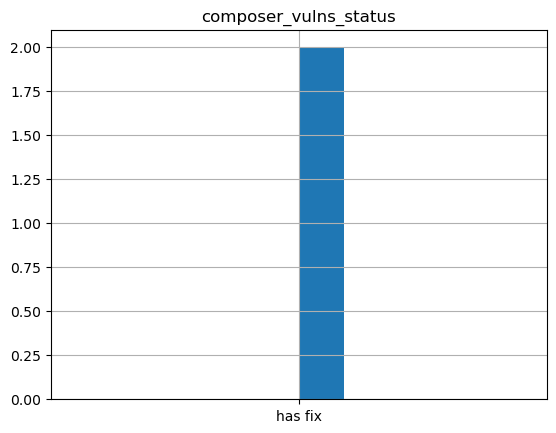

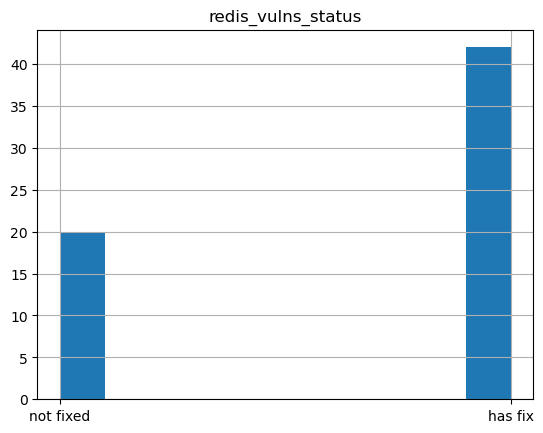

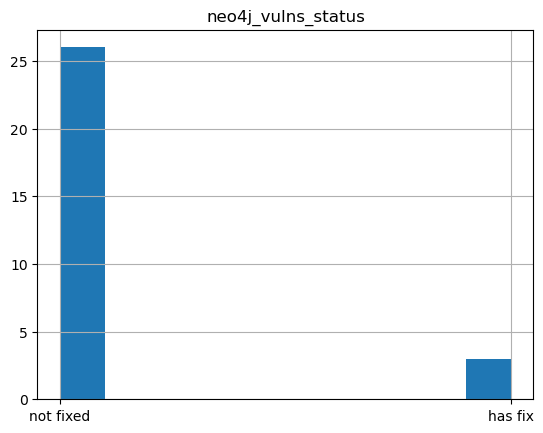

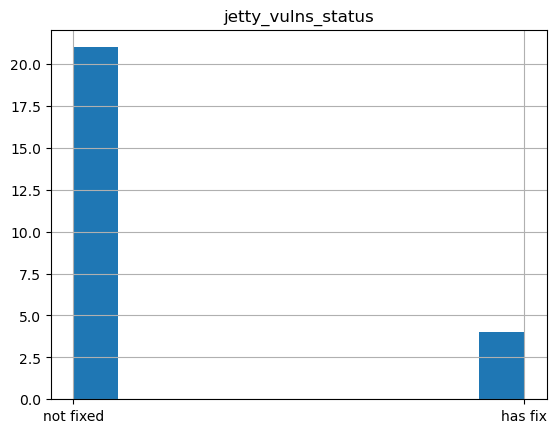

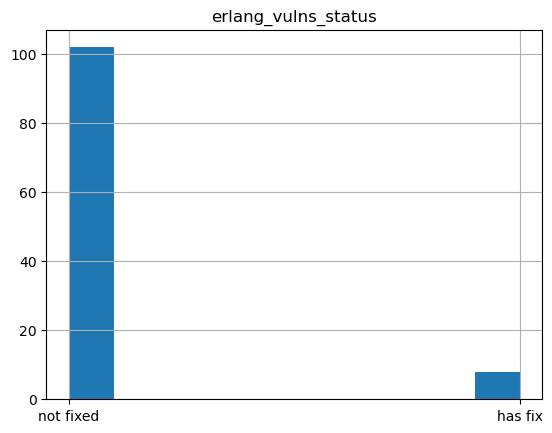

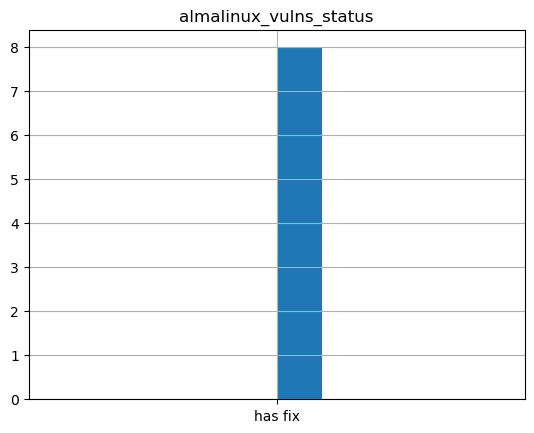

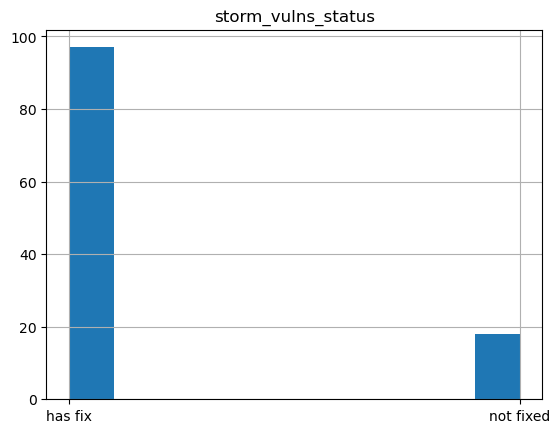

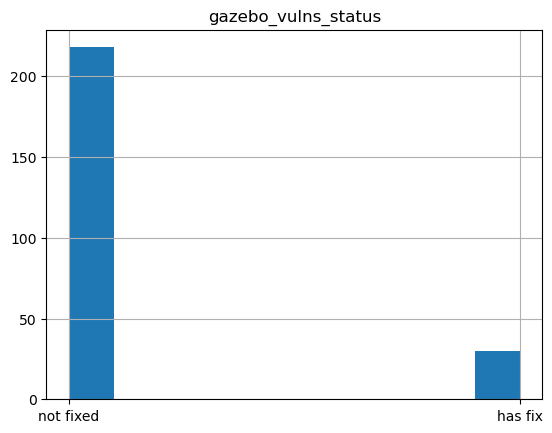

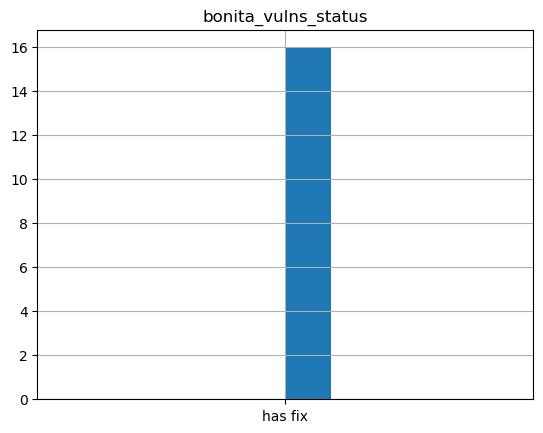

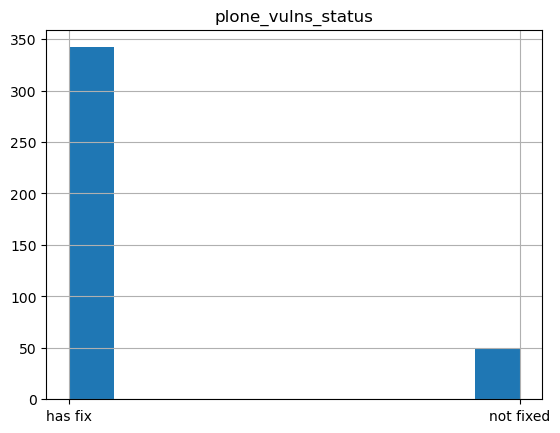

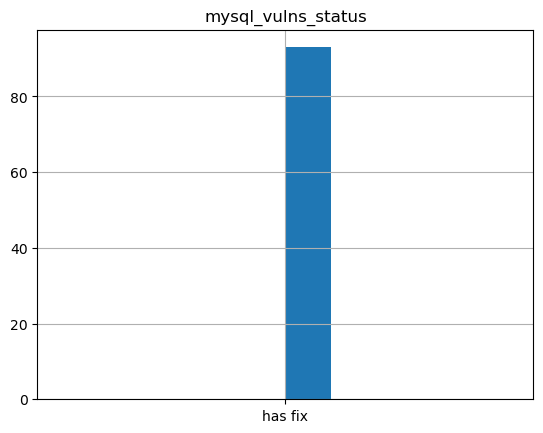

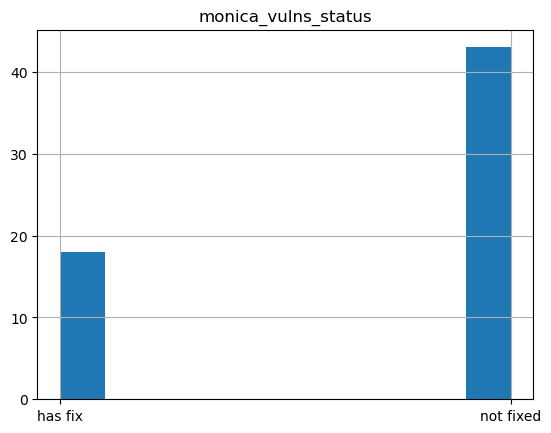

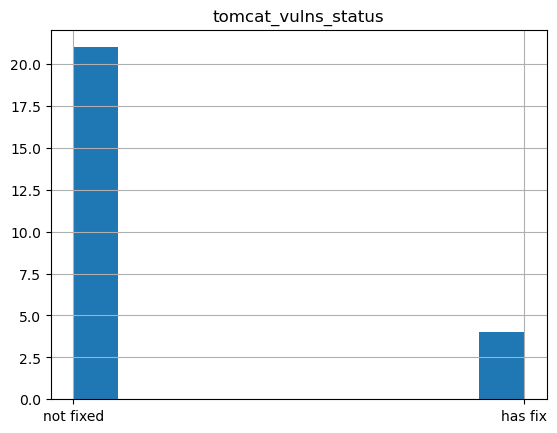

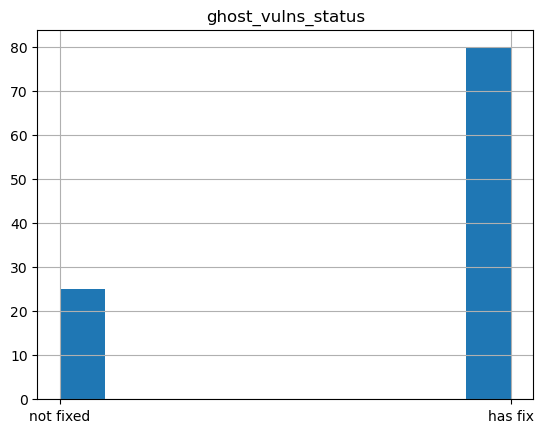

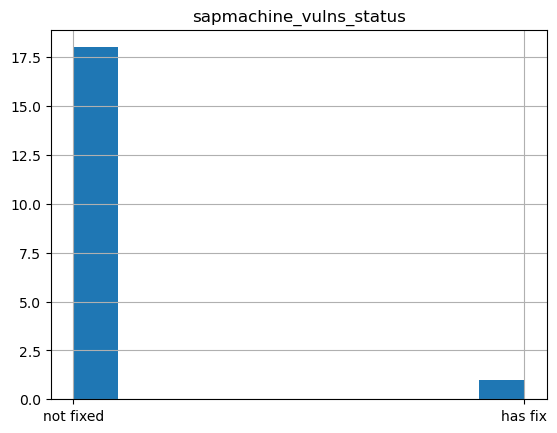

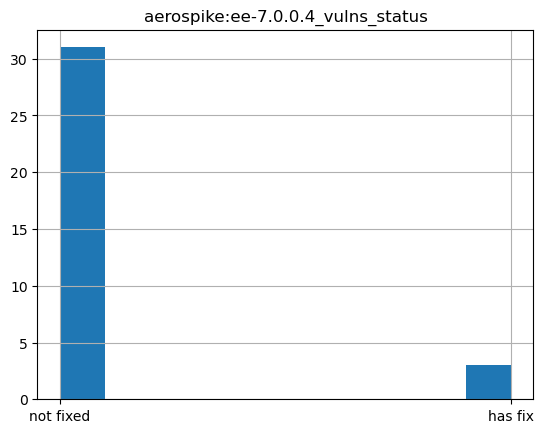

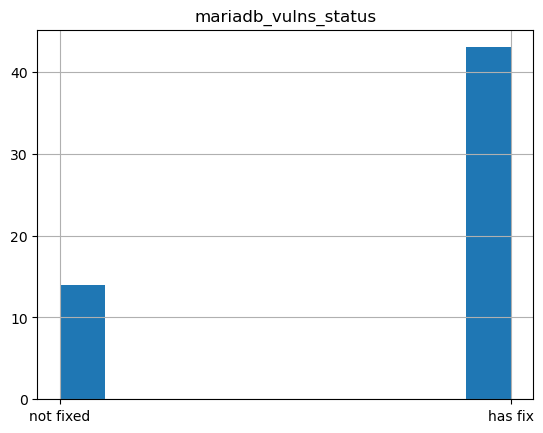

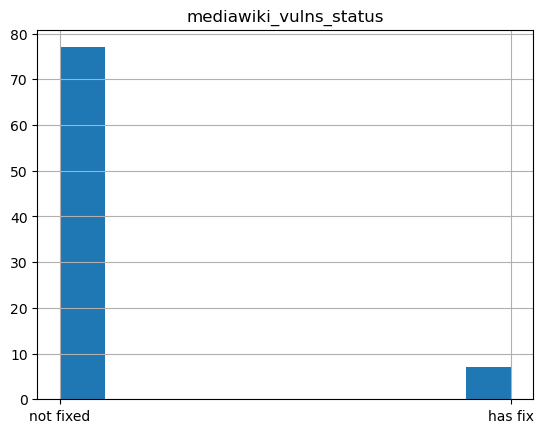

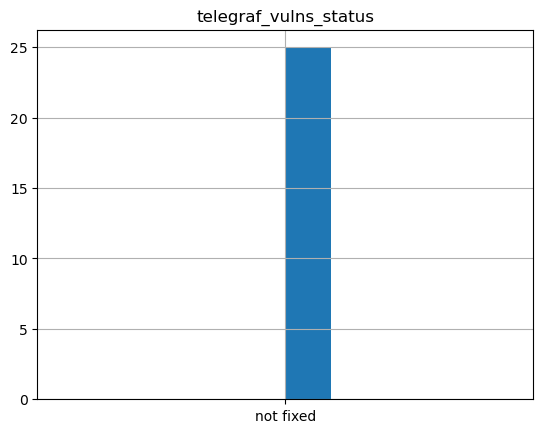

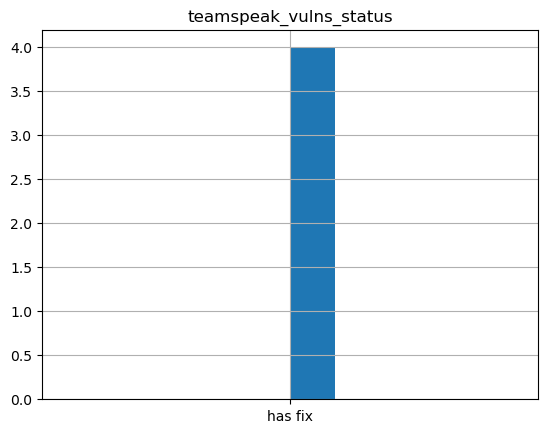

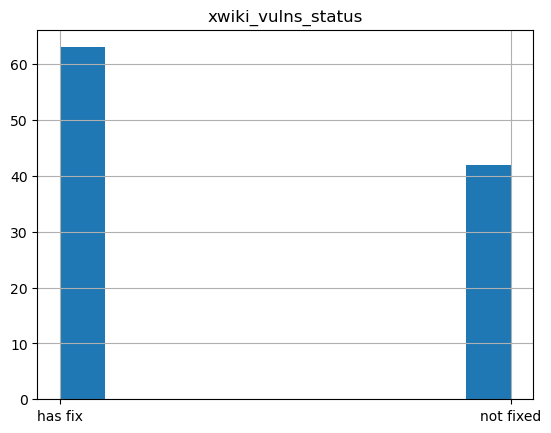

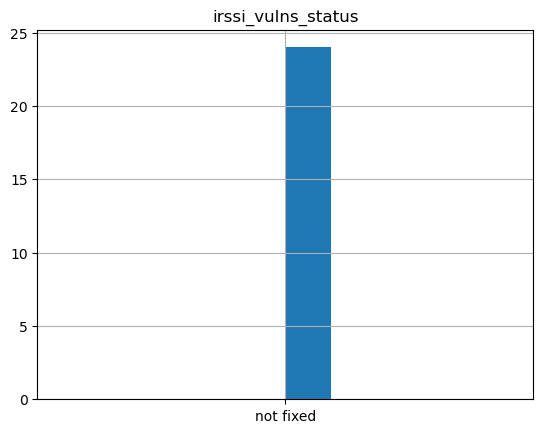

In [8]:
for container in containers:
    df.loc[df['Container'] == container]['Fixed_or_not'].hist()
    plt.title(container+"_vulns_status")
    plt.show()

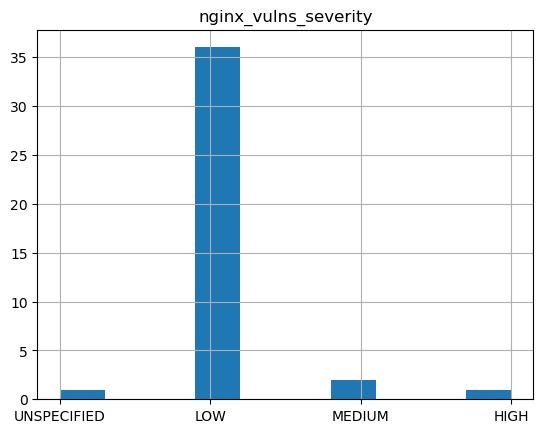

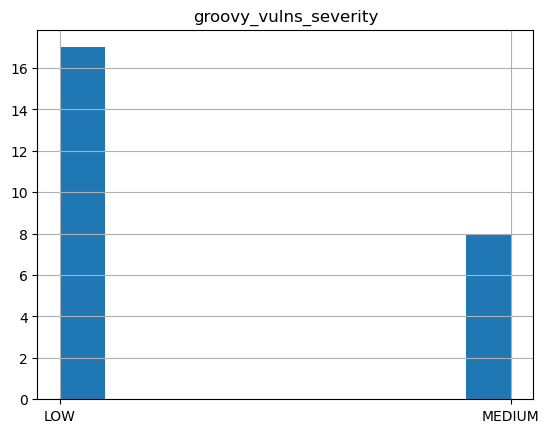

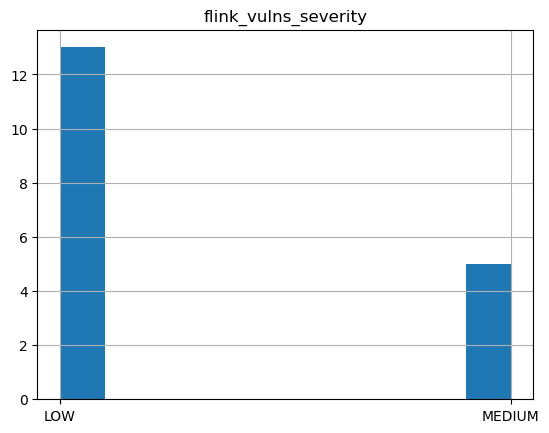

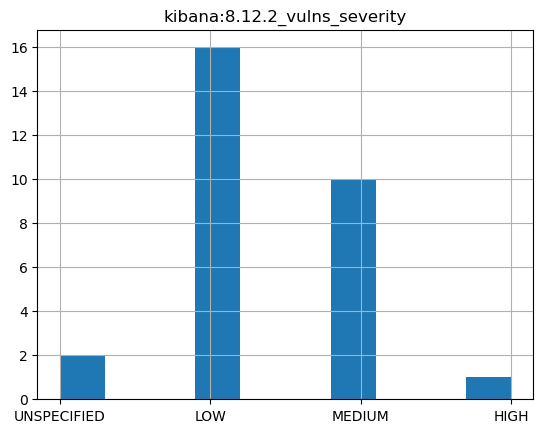

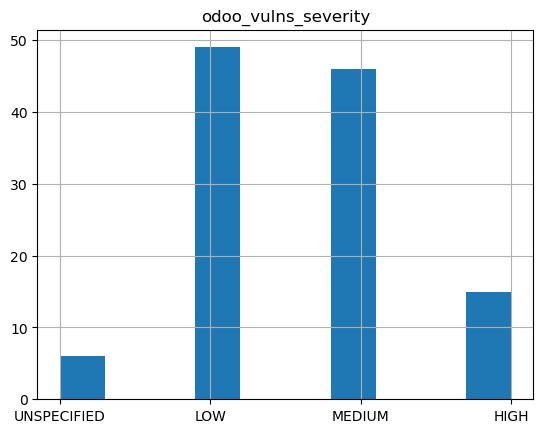

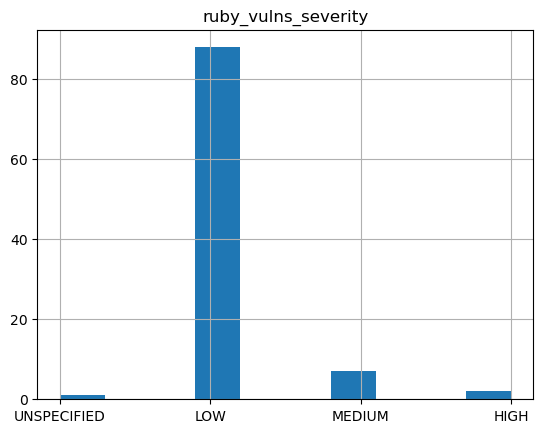

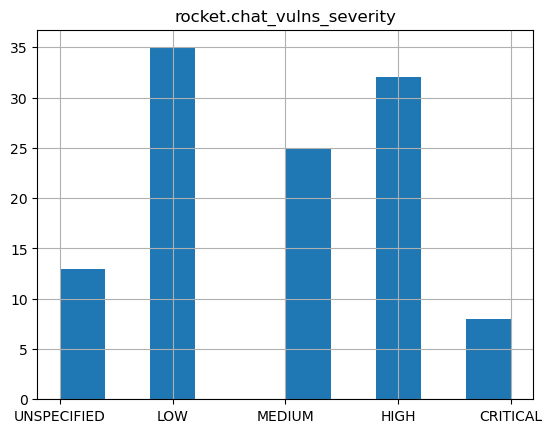

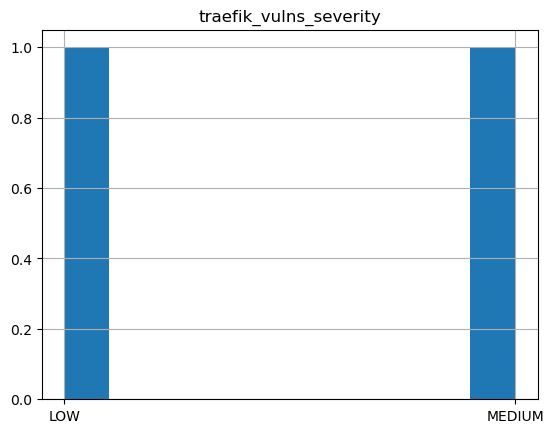

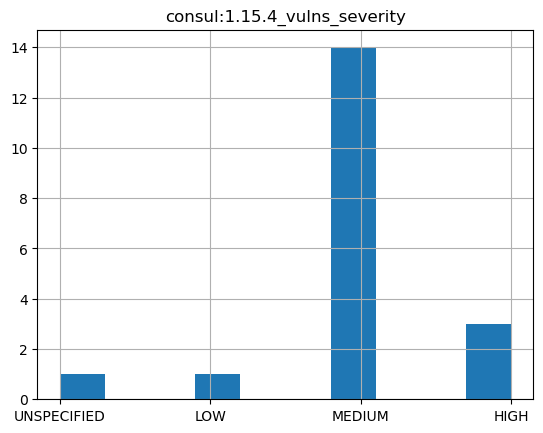

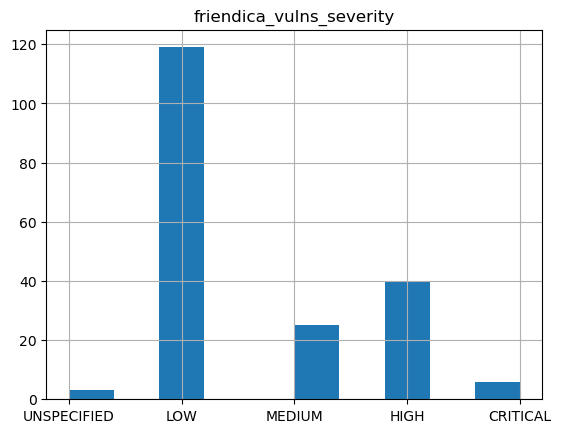

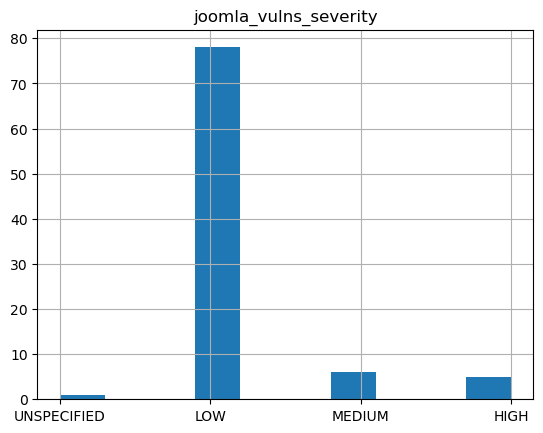

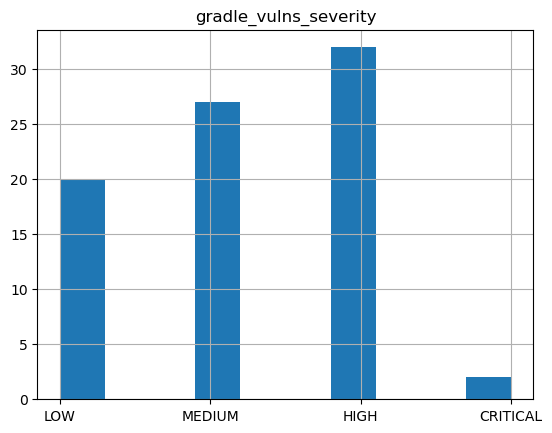

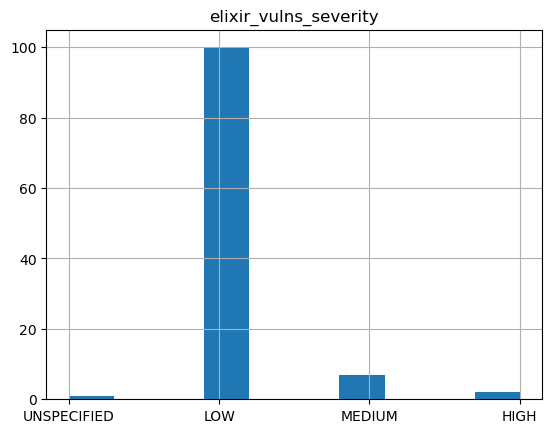

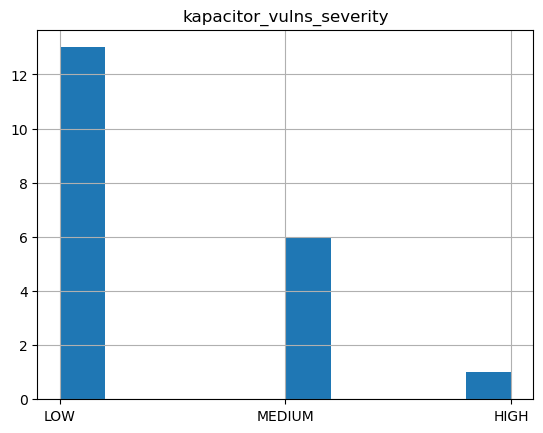

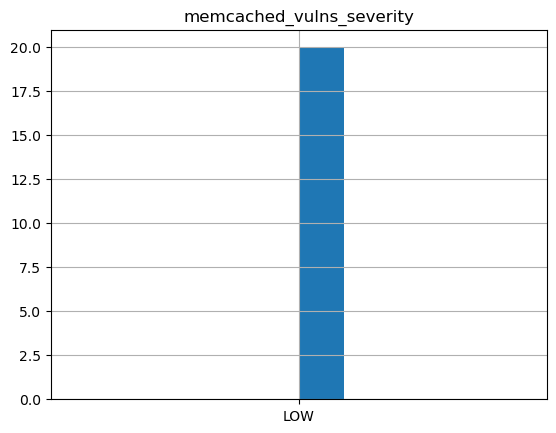

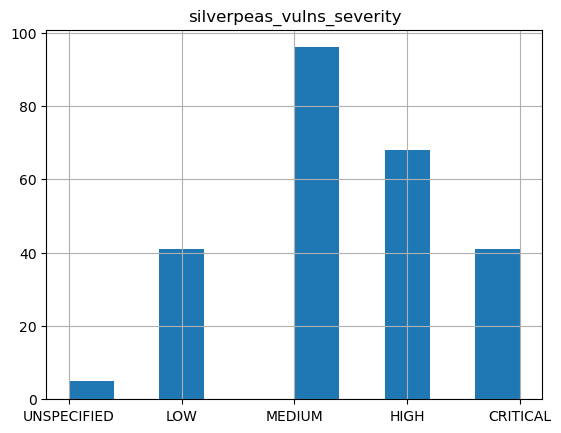

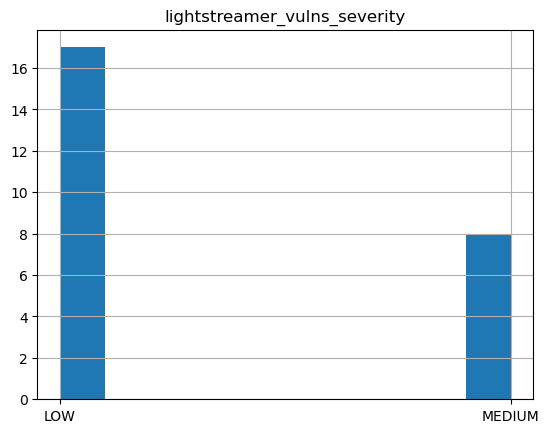

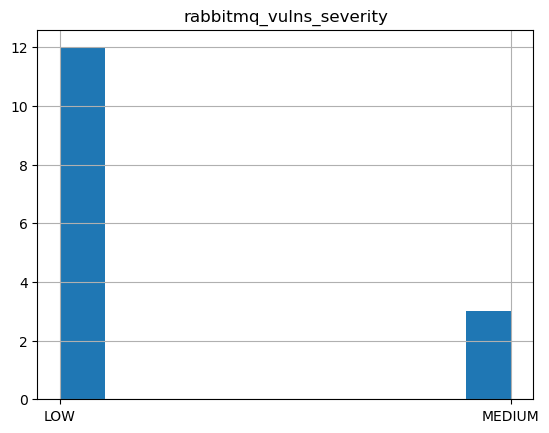

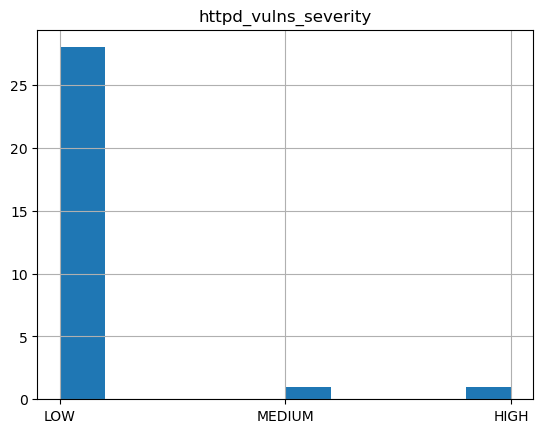

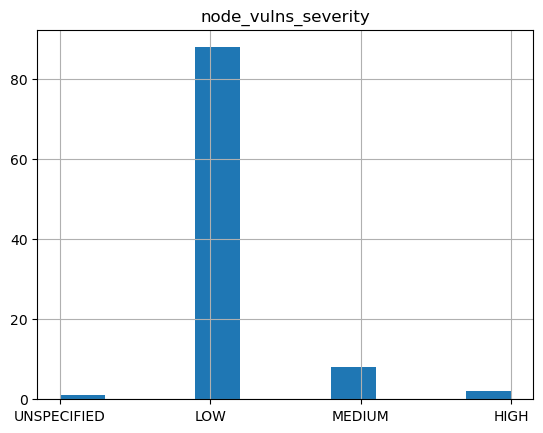

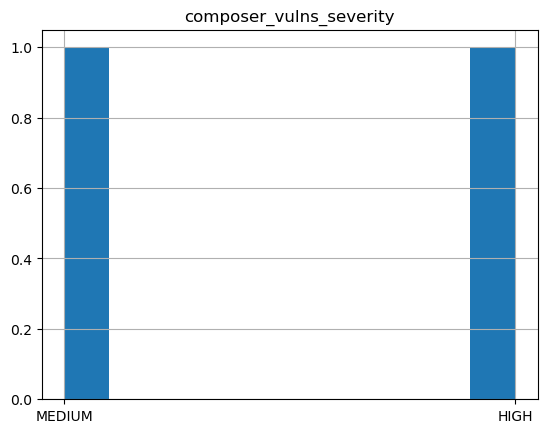

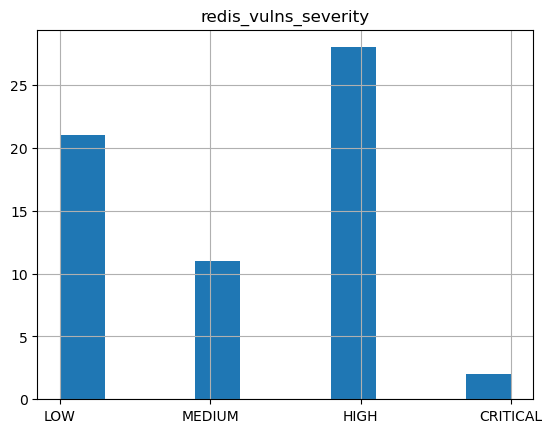

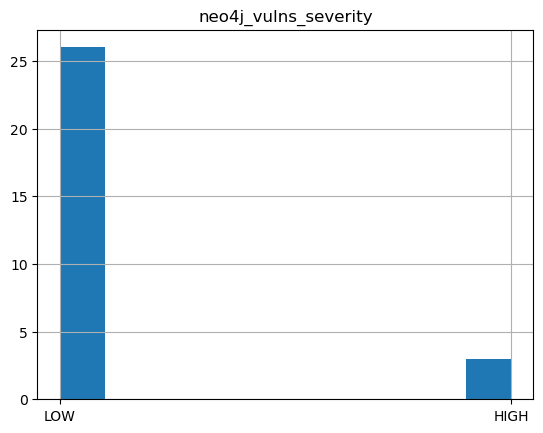

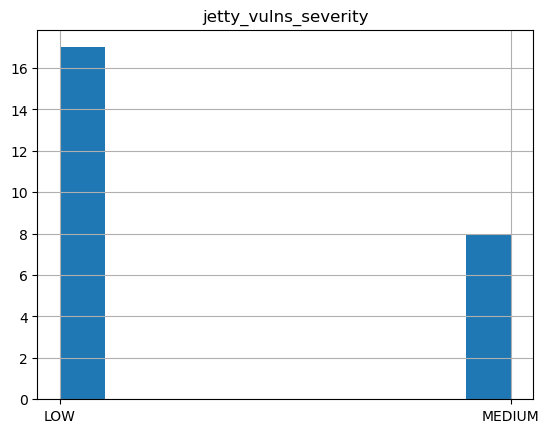

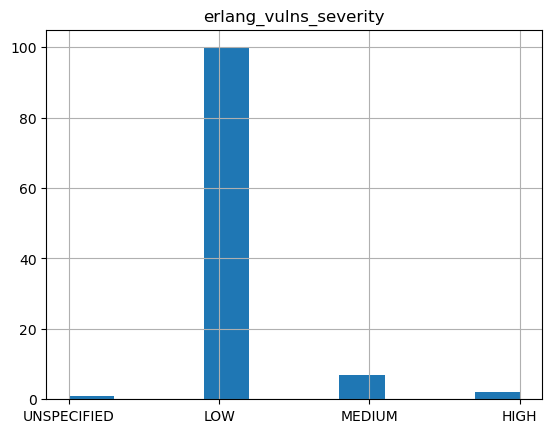

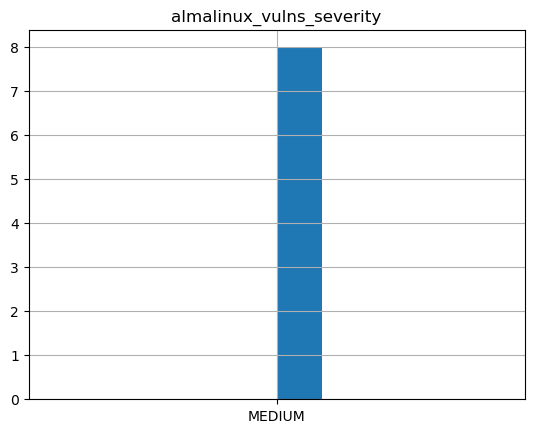

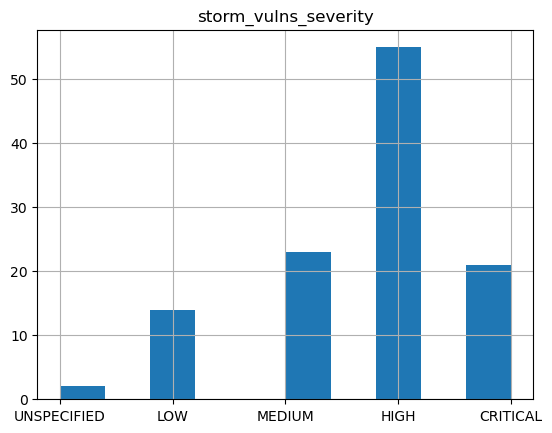

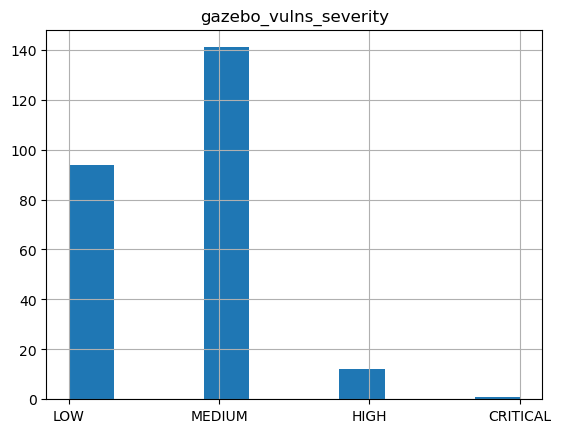

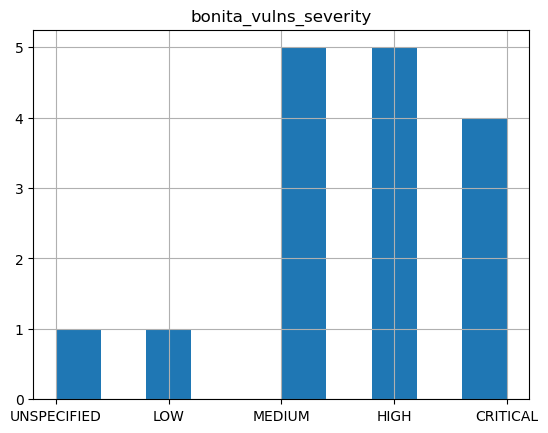

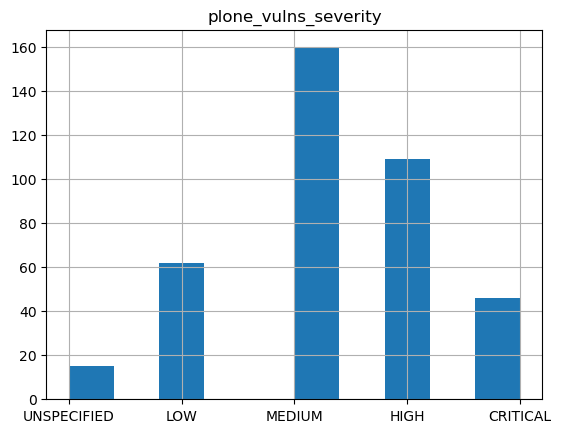

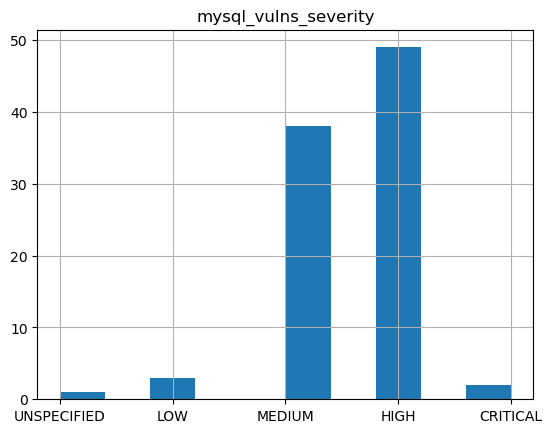

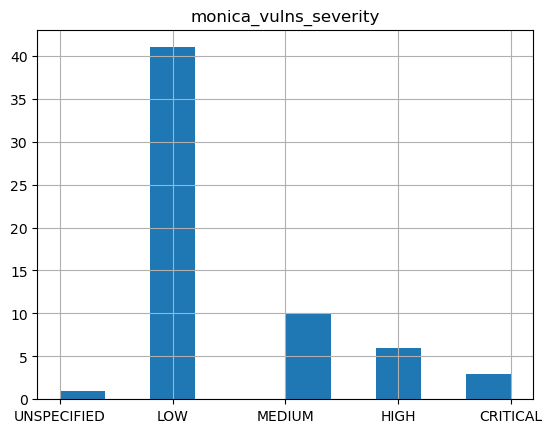

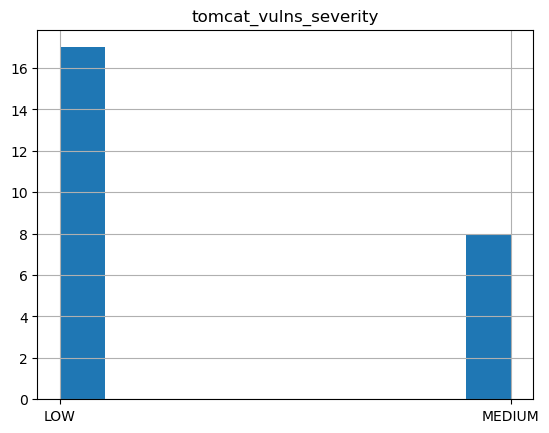

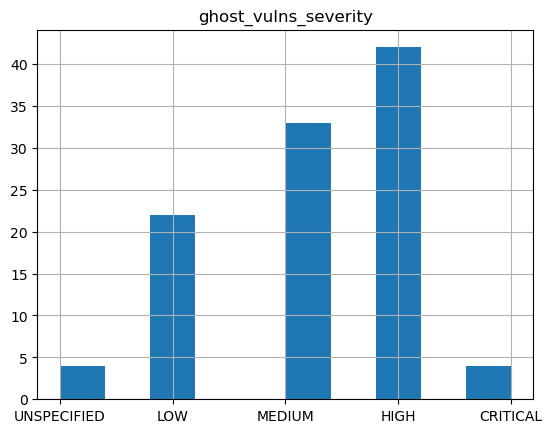

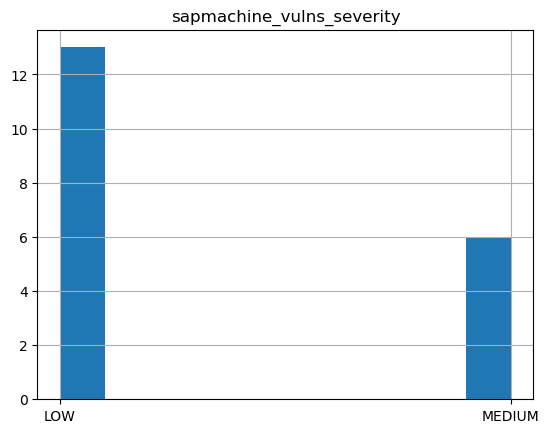

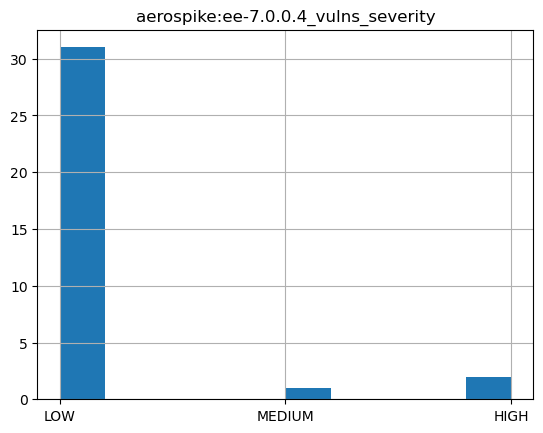

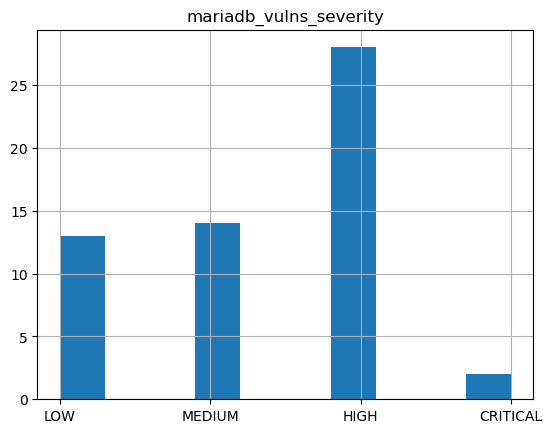

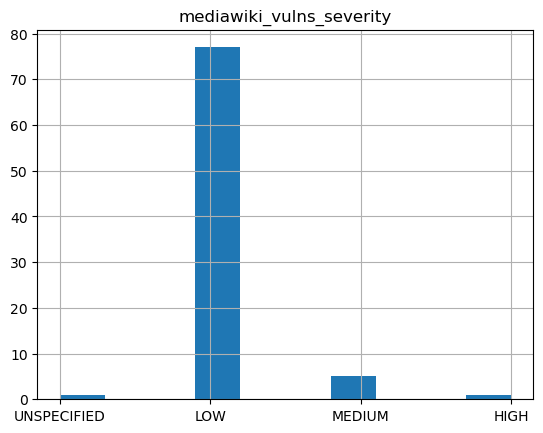

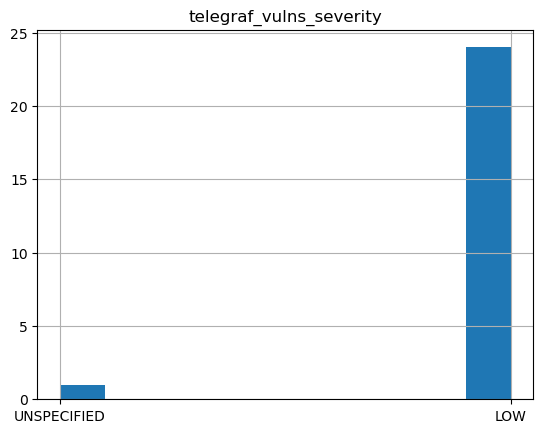

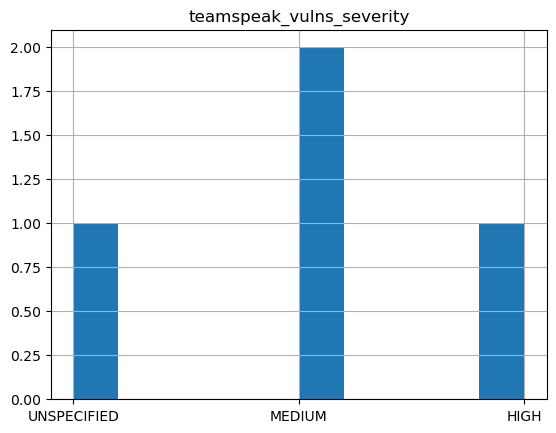

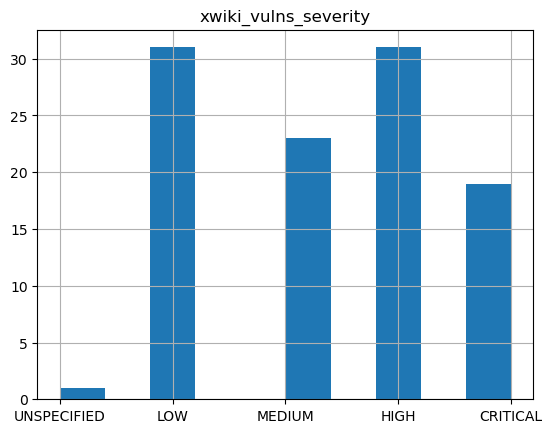

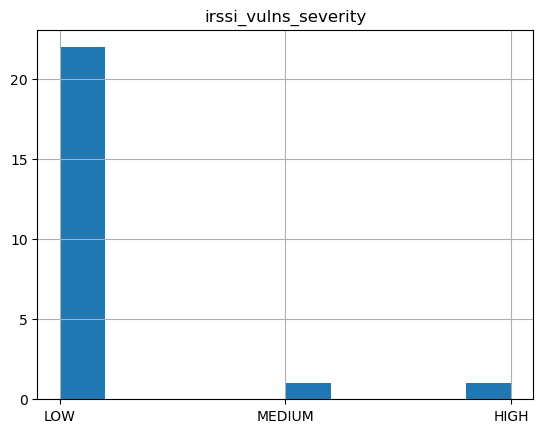

In [9]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [12]:
len(df.loc[df['Severity'] == "HIGH"])

581

In [15]:
len(df.loc[df['Container'] == "ruby"])

98

In [20]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "CRITICAL"])

0

In [18]:
df_aff = df.loc[df['Container'].isin(["almalinux", "eggdrop", "teamspeak", "nats", "busybox", "photon", "sl", "traefik"])]
print(df_aff)

     VulnerabilityID                                            PkgName  \
439    CVE-2020-8912      pkg:golang/github.com/aws/aws-sdk-go@1.44.327   
440    CVE-2020-8911      pkg:golang/github.com/aws/aws-sdk-go@1.44.327   
1622  CVE-2021-35937  pkg:rpm/almalinux/rpm@4.16.1.3-25.el9?os_name=...   
1623  CVE-2021-35938  pkg:rpm/almalinux/rpm@4.16.1.3-25.el9?os_name=...   
1624  CVE-2021-35939  pkg:rpm/almalinux/rpm@4.16.1.3-25.el9?os_name=...   
1625  CVE-2023-27043  pkg:rpm/almalinux/python3.9@3.9.18-1.el9_3?os_...   
1626   CVE-2023-5981  pkg:rpm/almalinux/gnutls@3.7.6-23.el9?os_name=...   
1627   CVE-2023-7104  pkg:rpm/almalinux/sqlite@3.34.1-6.el9_1?os_nam...   
1628   CVE-2024-0553  pkg:rpm/almalinux/gnutls@3.7.6-23.el9?os_name=...   
1629   CVE-2024-0567  pkg:rpm/almalinux/gnutls@3.7.6-23.el9?os_name=...   
2904   CVE-2023-6237  pkg:apk/alpine/openssl@3.1.4-r1?os_name=alpine...   
2905   CVE-2024-0727  pkg:apk/alpine/openssl@3.1.4-r1?os_name=alpine...   
2906   CVE-2023-6129  pkg

In [19]:
print(df_aff.Fixed_or_not.unique())
print(df_aff.loc[df_aff['Fixed_or_not'].isin(["not fixed"])])

['not fixed' 'has fix']
    VulnerabilityID                                        PkgName  \
439   CVE-2020-8912  pkg:golang/github.com/aws/aws-sdk-go@1.44.327   
440   CVE-2020-8911  pkg:golang/github.com/aws/aws-sdk-go@1.44.327   

    Fixed_or_not Severity Container  
439    not fixed      LOW   traefik  
440    not fixed   MEDIUM   traefik  


In [3]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

          VulnerabilityID                                            PkgName  \
83          GMS-2022-4708                             pkg:npm/d3-color@2.0.0   
84            GMS-2024-59                           pkg:npm/nodemailer@6.6.2   
107   GHSA-9h6g-pr28-7cqp                           pkg:npm/nodemailer@6.6.2   
111   GHSA-36jr-mh4h-2g58                             pkg:npm/d3-color@2.0.0   
112           GMS-2021-11                         pkg:pypi/python-ldap@3.2.0   
...                   ...                                                ...   
2608  GHSA-v78c-4p63-2j6c                     pkg:npm/moment-timezone@0.5.23   
2620  GHSA-xx4c-jj58-r7x6                           pkg:npm/validator@12.2.0   
2623  GHSA-984p-xq9m-4rjw                        pkg:npm/express-brute@1.0.1   
2684           GMS-2020-2                                pkg:npm/execa@1.0.0   
2908        GMS-2022-2955  pkg:maven/com.fasterxml.jackson.core/jackson-d...   

     Fixed_or_not     Severity      Con